# ASSIGNMENT ON  ADVANCED ML (DRY-BEAN-CLASSIFICATION)

**- Problem statement**
The goal of this project is to predict the type of bean using various features of the bean. This is a multi-class classification problem. F1-score is taken as an evaluation metric.

**- Dataset**
The dataset for this assignment is the Dry Bean Dataset. It contains various features of different types of beans, as well as their corresponding type.

**- Relevant Information**
Seven different types of dry beans were used in the research, taking into account the features such as form, shape, type, and structure by the market situation. A computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features in order to obtain uniform seed classification. For the classification model, images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. Bean images obtained by computer vision system were subjected to segmentation and feature extraction stages, and a total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.

**- Data description**
The dataset contains the following features:

- Area (A): The area of a bean zone and the number of pixels within its boundaries.
- Perimeter (P): Bean circumference is defined as the length of its border.
- Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.
- Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.
- Aspect ratio (K): Defines the relationship between L and l.
- Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.
- Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
- Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.
- Extent (Ex): The ratio of the pixels in the bounding box to the bean area.
- Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
- Roundness (R): Calculated with the following formula: (4piA)/(P^2)
- Compactness (CO): Measures the roundness of an object: Ed/L
- ShapeFactor1 (SF1)
- ShapeFactor2 (SF2)
- ShapeFactor3 (SF3)
- ShapeFactor4 (SF4)
- Class (the type of bean: Seker, Barbunya, Bombay, Cali, Dermosan, Horoz, and Sira)

**NOTE: The Class column is the target variable.**



# Import Dataset and EDA

**Import Libraries and Dataset**

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

In [37]:
df = pd.read_csv('beans-230421-141141.csv')

**Data Overview**

In [38]:
df.head(10)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715.0,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172.0,191.272750,0.783968,0.984986,0.887034,NaN,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690.0,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724.0,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417.0,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
5,30279,634.927,212.560556,181.510182,1.171067,0.520401,30600.0,196.347702,0.775688,0.989510,0.943852,NaN,0.007020,0.003153,0.853270,0.999236,SEKER
6,30477,670.033,211.050155,184.039050,1.146768,0.489478,NaN,196.988633,0.762402,0.984081,0.853080,0.933374,0.006925,0.003242,0.871186,NaN,SEKER
7,30519,629.727,212.996755,182.737204,1.165591,0.513760,30847.0,197.124320,0.770682,0.989367,0.967109,0.925480,0.006979,0.003158,0.856514,0.998345,SEKER
8,30685,635.681,213.534145,183.157146,1.165852,0.514081,31044.0,197.659696,0.771561,0.988436,0.954240,0.925658,0.006959,0.003152,0.856844,0.998953,SEKER
9,30834,631.934,217.227813,180.897469,1.200834,0.553642,NaN,198.139012,0.783683,0.990810,0.970278,0.912125,0.007045,0.003008,0.831973,0.999061,SEKER


In [39]:
df.shape

(13611, 17)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  12577 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       12808 non-null  float64
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      12223 non-null  float64
 12  ShapeFactor1     13080 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     12563 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [41]:
df.isnull().sum()

Area                  0
Perimeter             0
MajorAxisLength       0
MinorAxisLength    1034
AspectRation          0
Eccentricity          0
ConvexArea          803
EquivDiameter         0
Extent                0
Solidity              0
roundness             0
Compactness        1388
ShapeFactor1        531
ShapeFactor2          0
ShapeFactor3          0
ShapeFactor4       1048
Class                 0
dtype: int64

In [42]:
missing_col = ['MinorAxisLength','ConvexArea','Compactness','ShapeFactor1','ShapeFactor4']
#Using mean to impute the missing values
for i in missing_col:
    df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].mean()

In [43]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [44]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.295543,1.583242,0.750895,53726.689413,253.064220,0.749733,0.987143,0.873282,0.799551,0.006564,0.001716,0.643590,0.995069
std,29324.095717,214.289696,85.694186,43.299974,0.246678,0.092002,28948.807252,59.177120,0.049086,0.004660,0.059520,0.058418,0.001108,0.000596,0.098996,0.004169
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,177.465431,1.432307,0.715928,37282.500000,215.068003,0.718634,0.985670,0.832096,0.767887,0.005948,0.001154,0.581359,0.994016
50%,44652.000000,794.941000,296.883367,194.689529,1.551124,0.764441,46319.000000,238.438026,0.759859,0.988283,0.883157,0.799551,0.006608,0.001694,0.642044,0.996048
75%,61332.000000,977.213000,376.495012,212.964409,1.707109,0.810466,60540.000000,279.446467,0.786851,0.990013,0.916869,0.829306,0.007239,0.002170,0.696006,0.997769
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


**From this data overview we can see that:**

>* The dataset has **13611 rows** and **17 columns**
>* All columns are numerical except **"Class"** column which will be our target
>* By looking at the description of the data we can come to the conclusion that our data will need standardization




**Target Info**

In [45]:
df['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [46]:
df['Class'].value_counts()

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

> * There is 7 unique types of beans in "Class" Column
> * **BOMBAY** occurs the least amount of times in dataset
> * **DERMASON** most often appears in our dataset

**Class Column Visualization**

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64


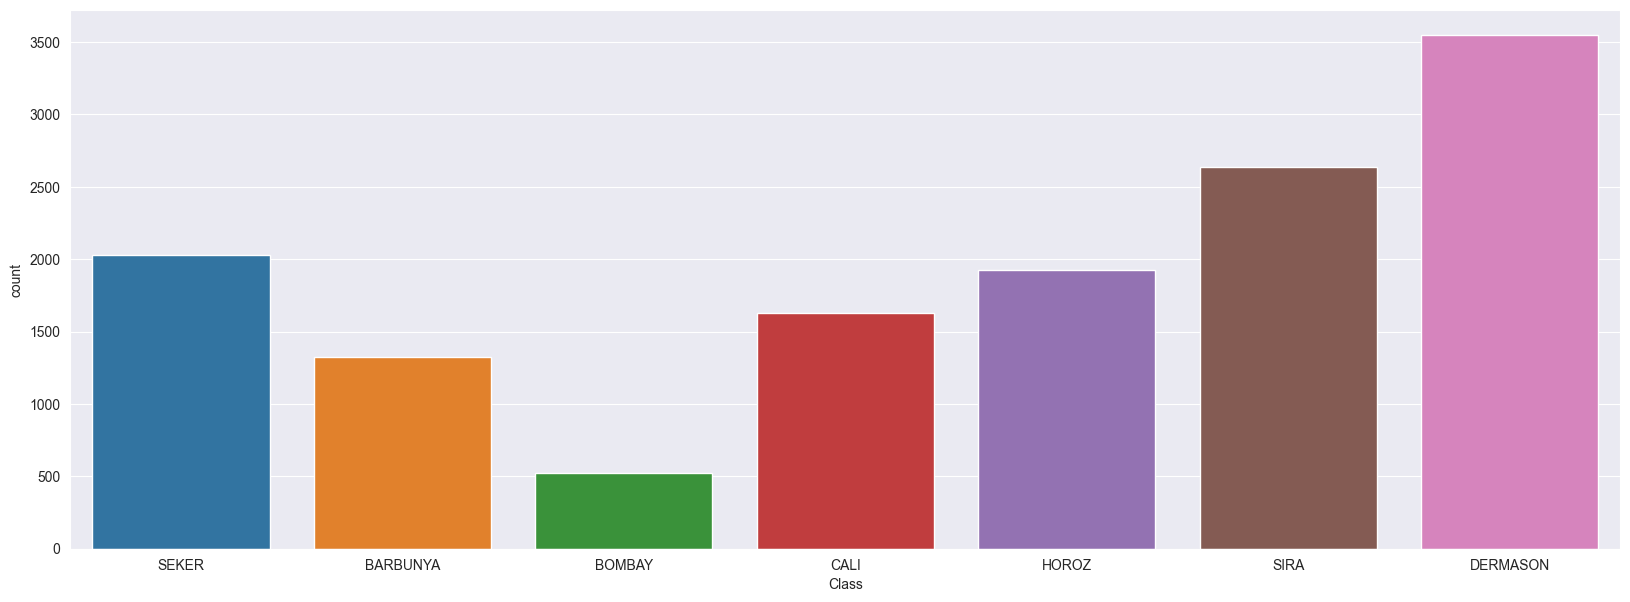

In [47]:
plt.figure(figsize=(20,7))
print(df['Class'].value_counts())
_ = sns.countplot(x='Class', data=df)

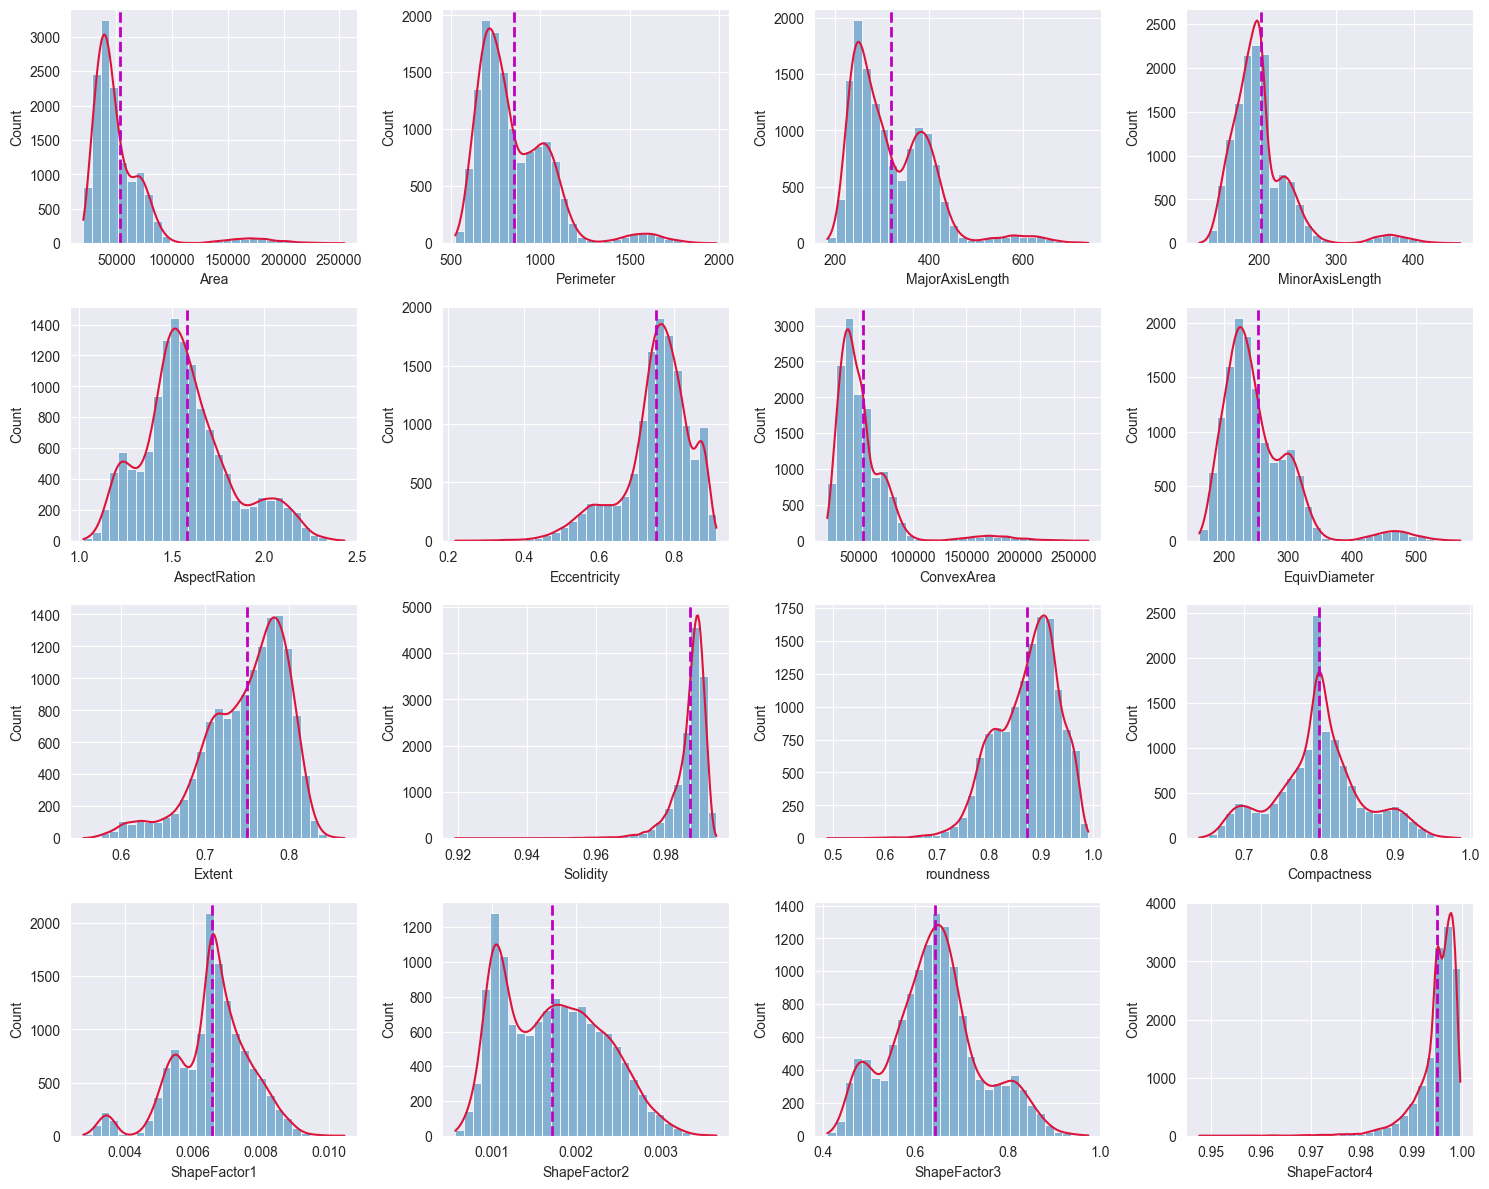

In [48]:
Numeric_cols = df.drop(columns=['Class']).columns

fig, ax = plt.subplots(4, 4, figsize=(15, 12))
for variable, subplot in zip(Numeric_cols, ax.flatten()):
    g=sns.histplot(df[variable],bins=30, kde=True, ax=subplot)
    g.lines[0].set_color('crimson')
    g.axvline(x=df[variable].mean(), color='m', label='Mean', linestyle='--', linewidth=2)
plt.tight_layout()

**Since, We can see that our variables in the data contains many outliers**

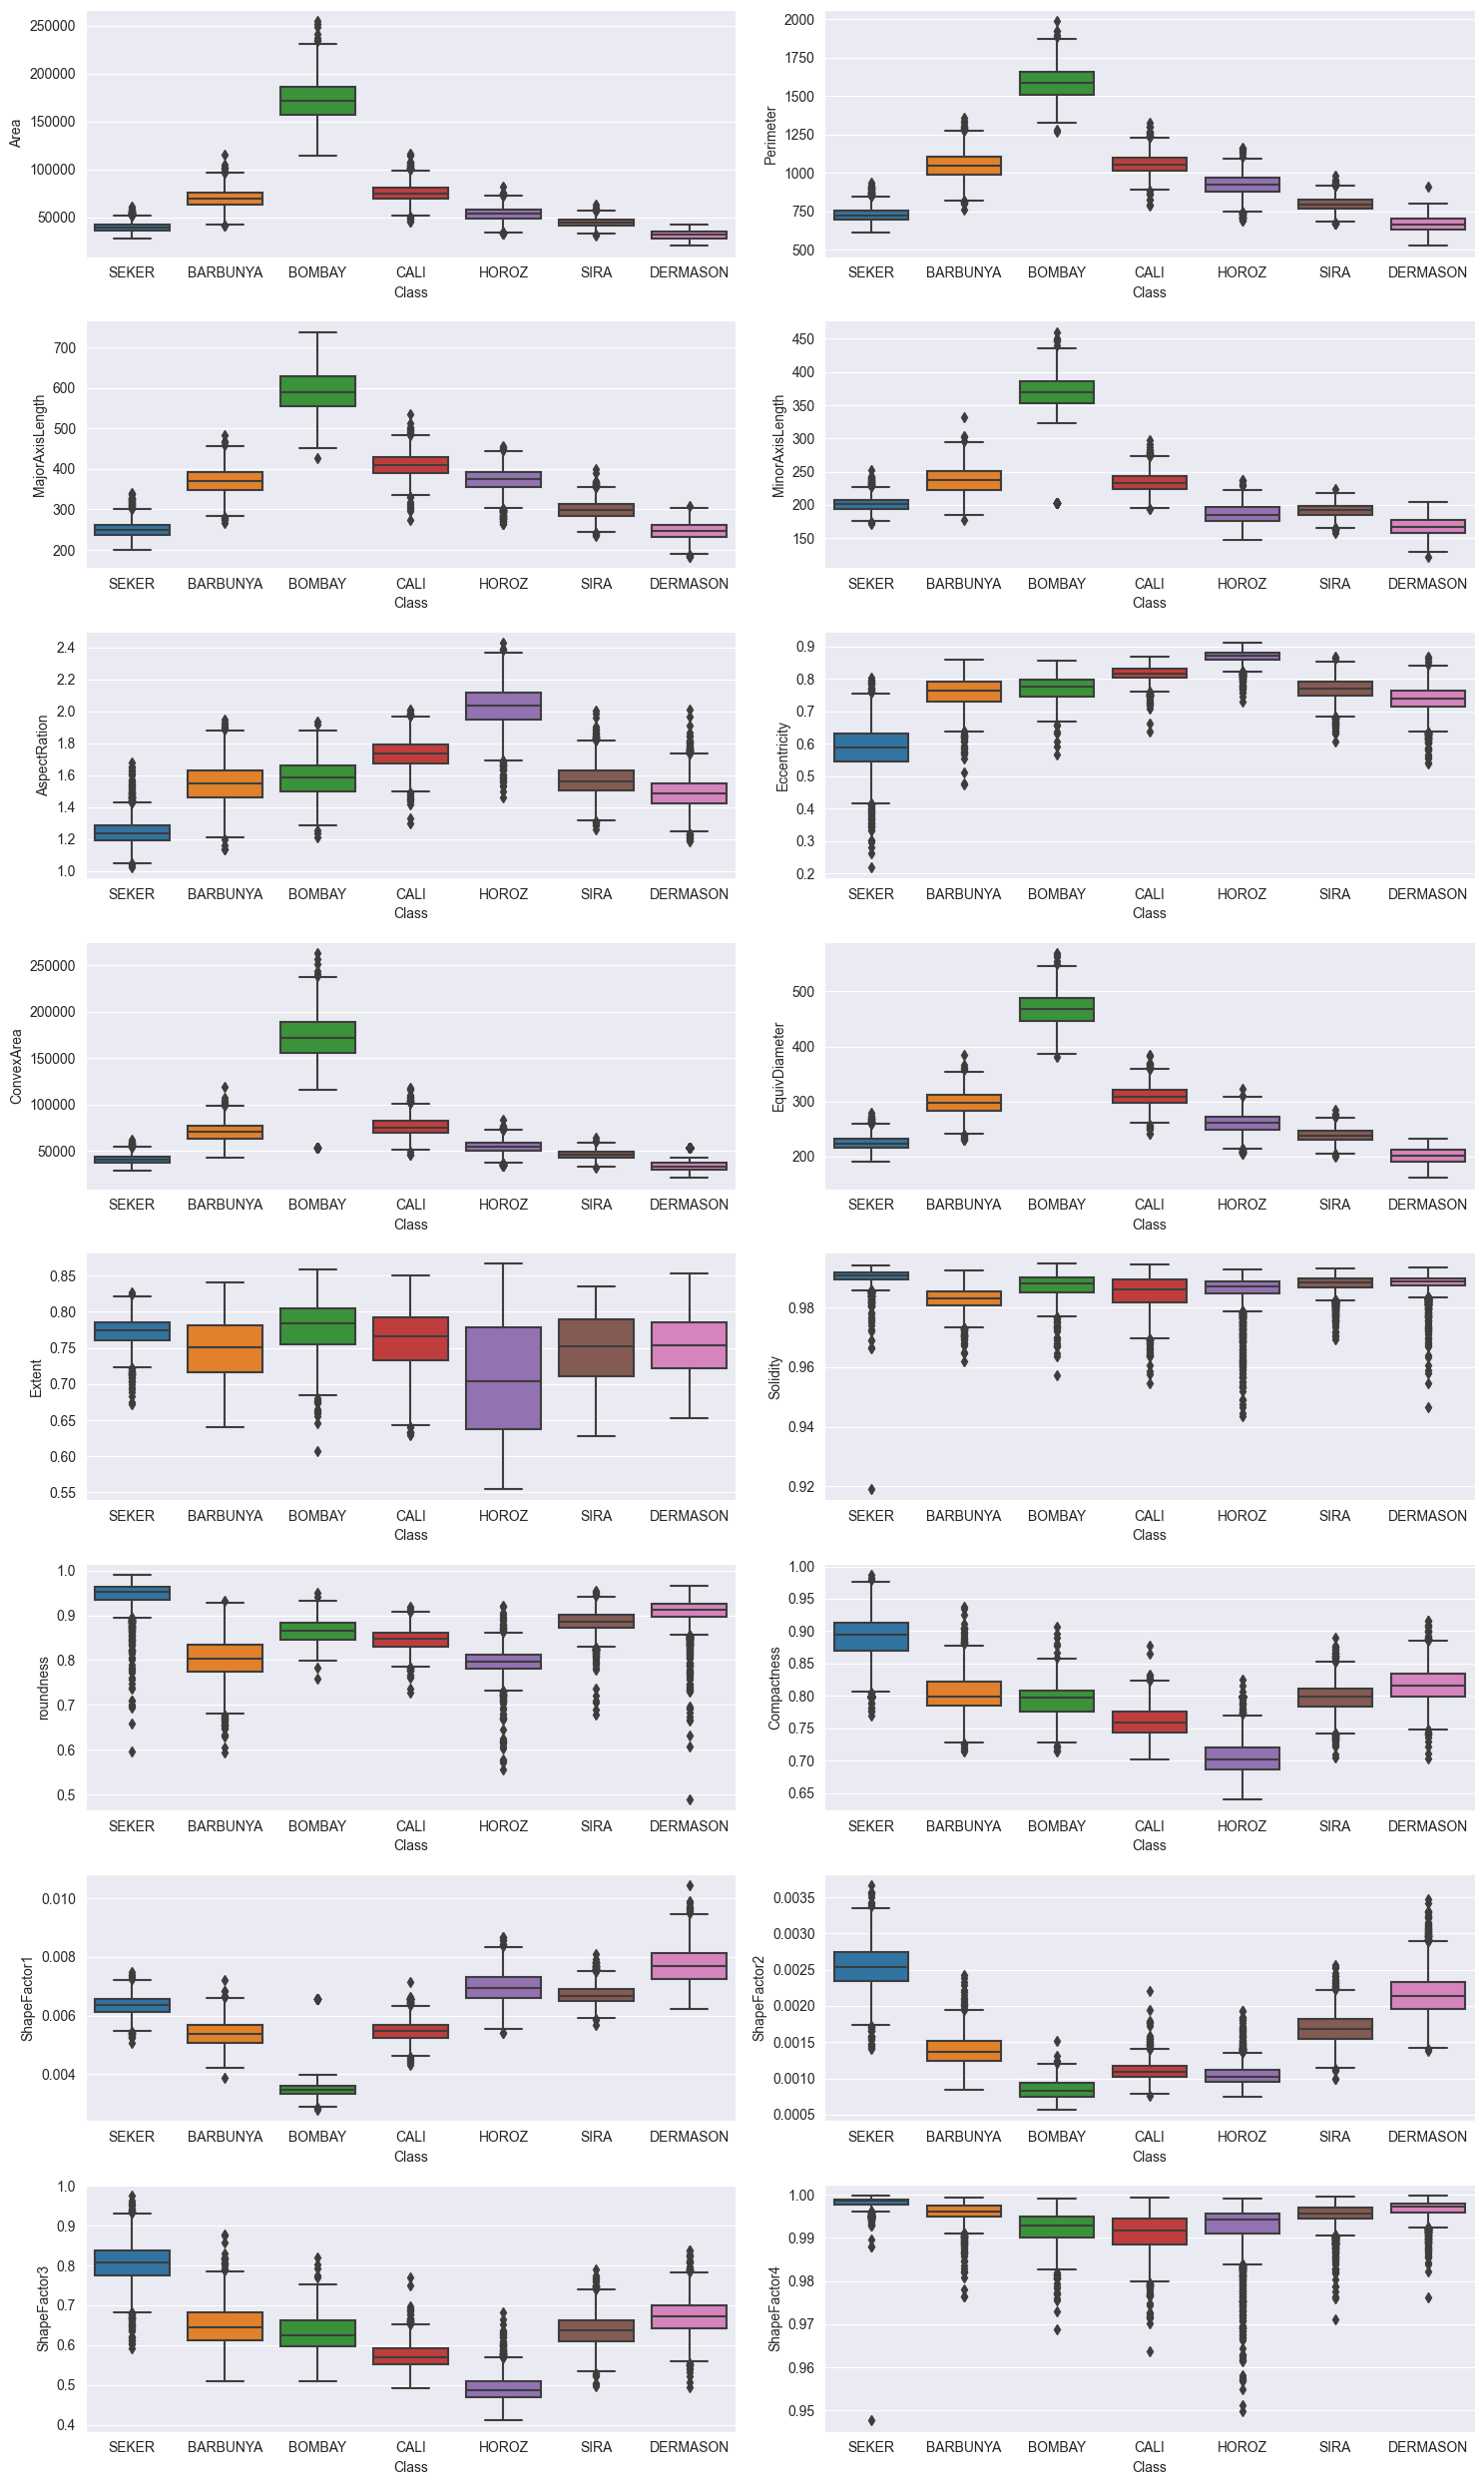

In [49]:
fig, ax = plt.subplots(8, 2, figsize=(15, 25))

for variable, subplot in zip(Numeric_cols, ax.flatten()):
    sns.boxplot(x=df['Class'], y= df[variable], ax=subplot)
plt.tight_layout()

In [50]:
labelencoder = LabelEncoder()
df["Class"] = labelencoder.fit_transform(df['Class'])

**Correlation Heatmap**

Text(0.5, 1.0, 'Correlation Heatmap')

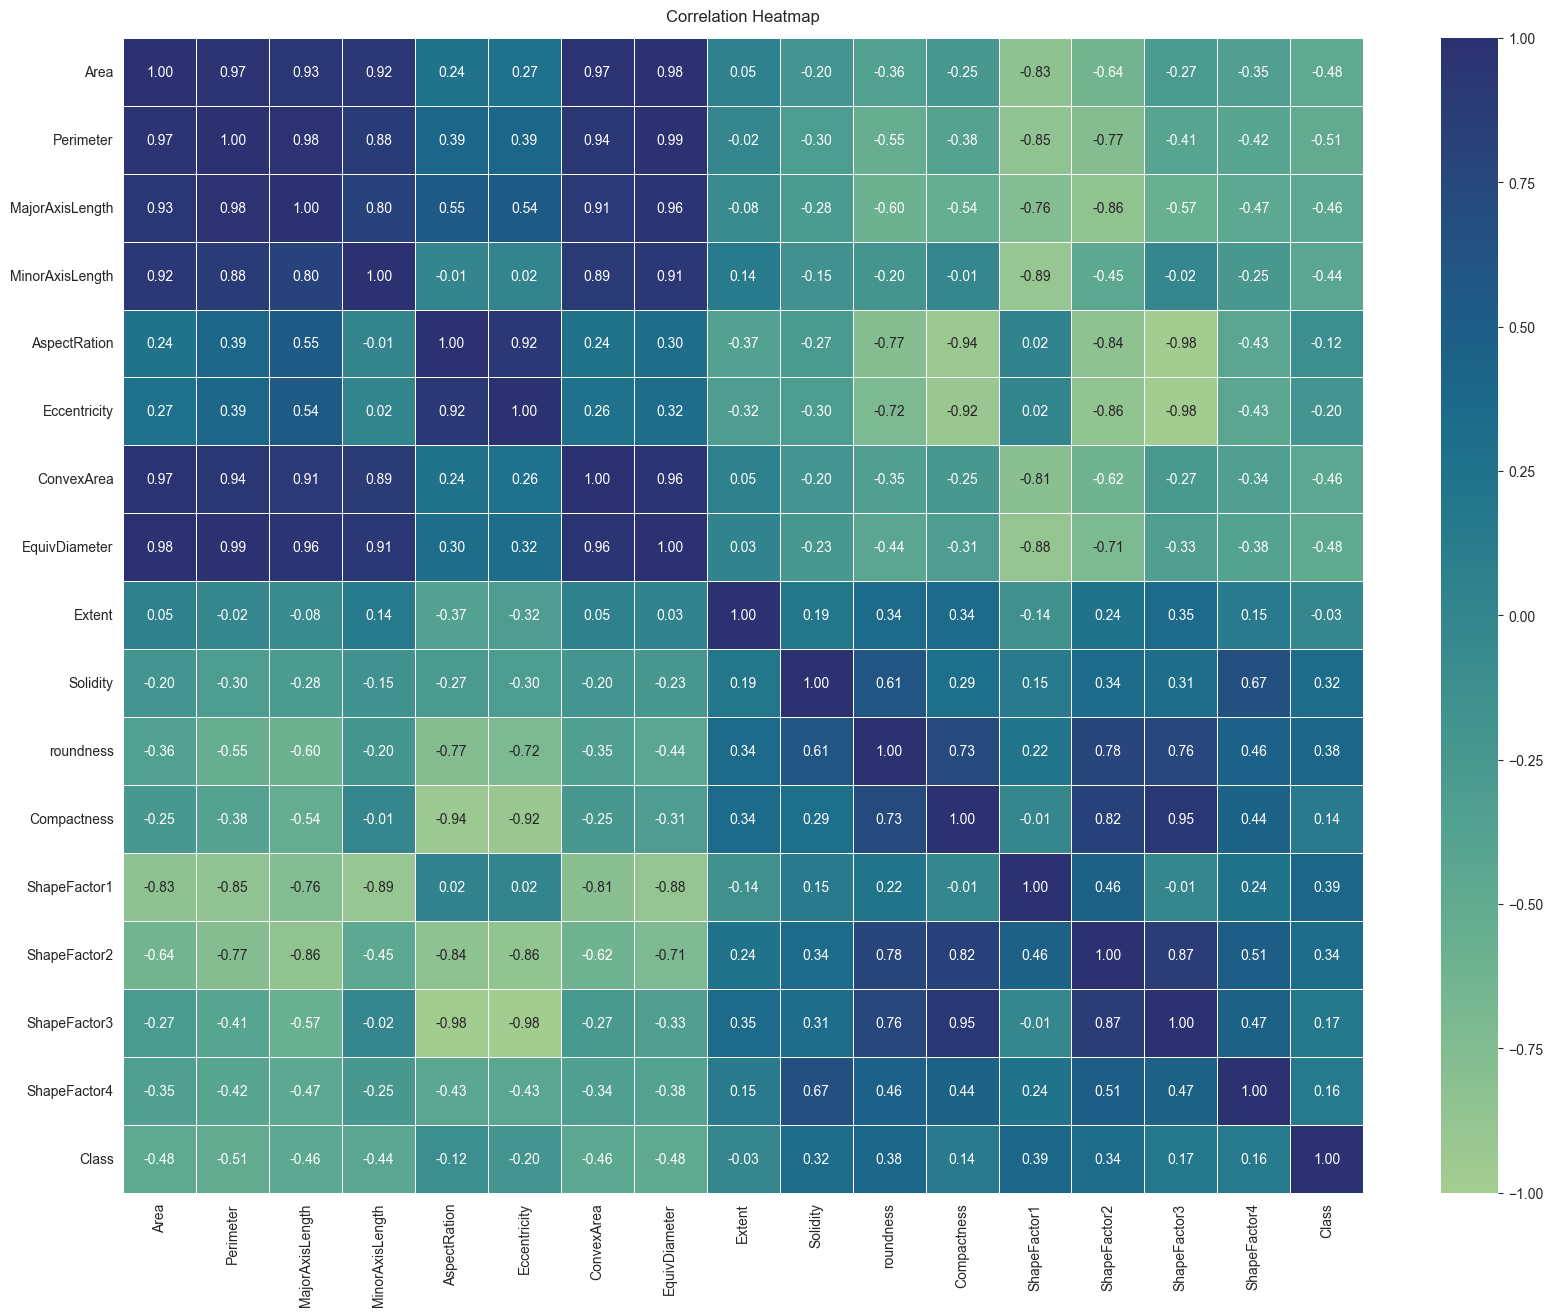

In [51]:
plt.figure(figsize=(20,15))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, fmt=".2f", linewidth=.5, cmap="crest")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

**Attributes Histogram**

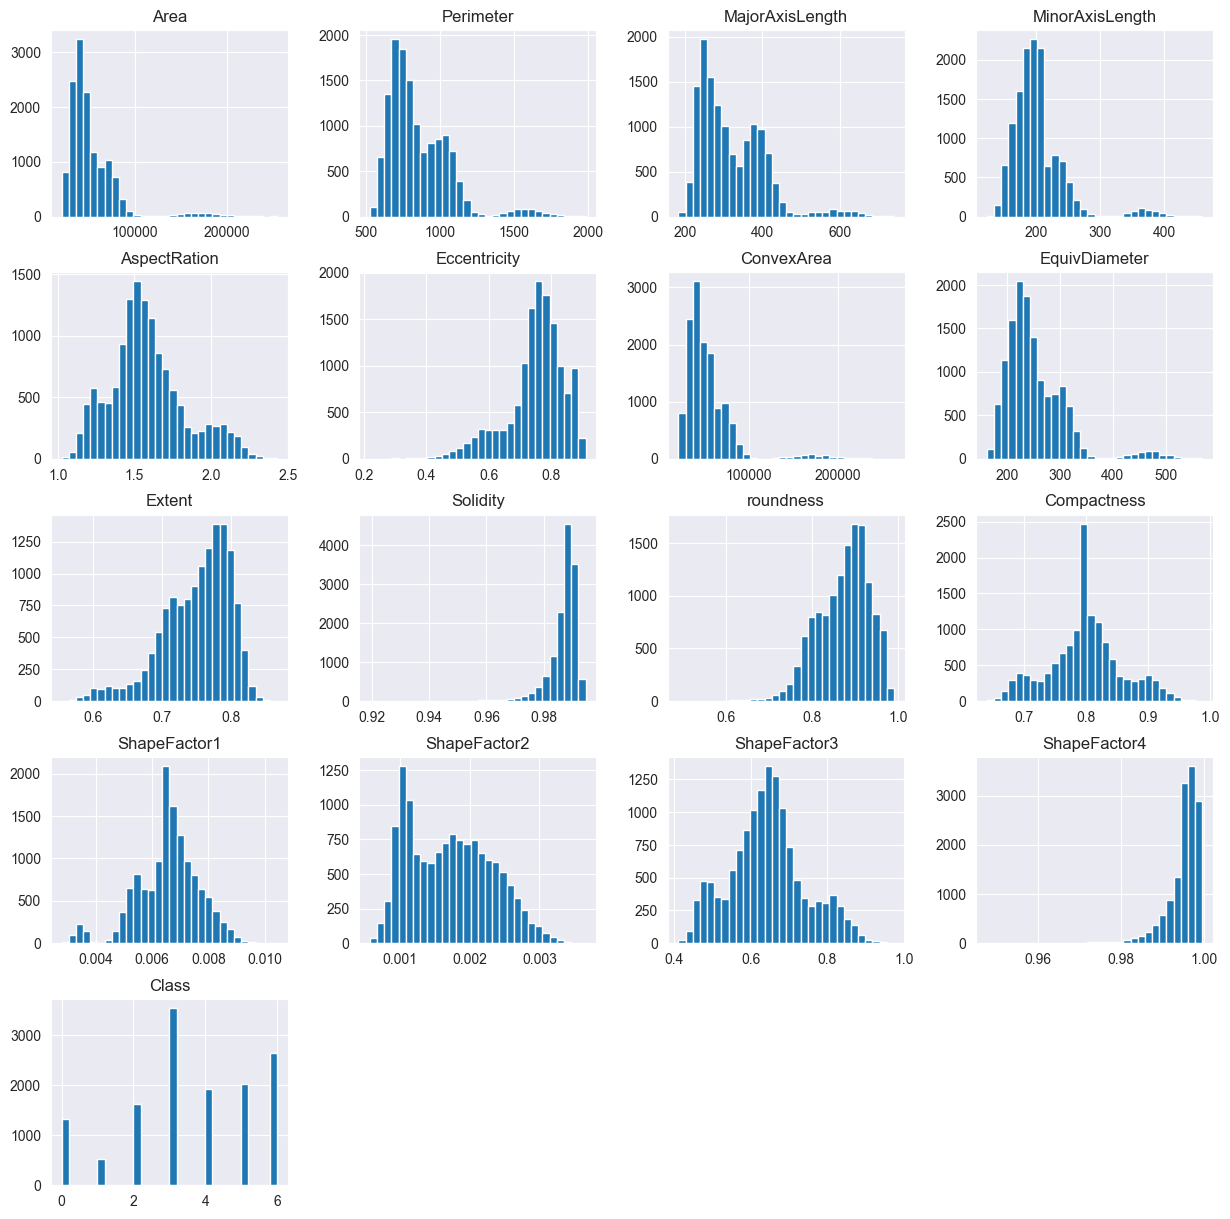

In [52]:
df.hist(bins=30, figsize=(15,15))
plt.show()

### DEALING WITH OUTLIERS

In [53]:
for x in ['Area','Perimeter','MajorAxisLength','MinorAxisLength','AspectRation','Eccentricity','ConvexArea','EquivDiameter',
          'Extent','Solidity','roundness','Compactness','ShapeFactor4']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

**Plot After Dealing with outliers**

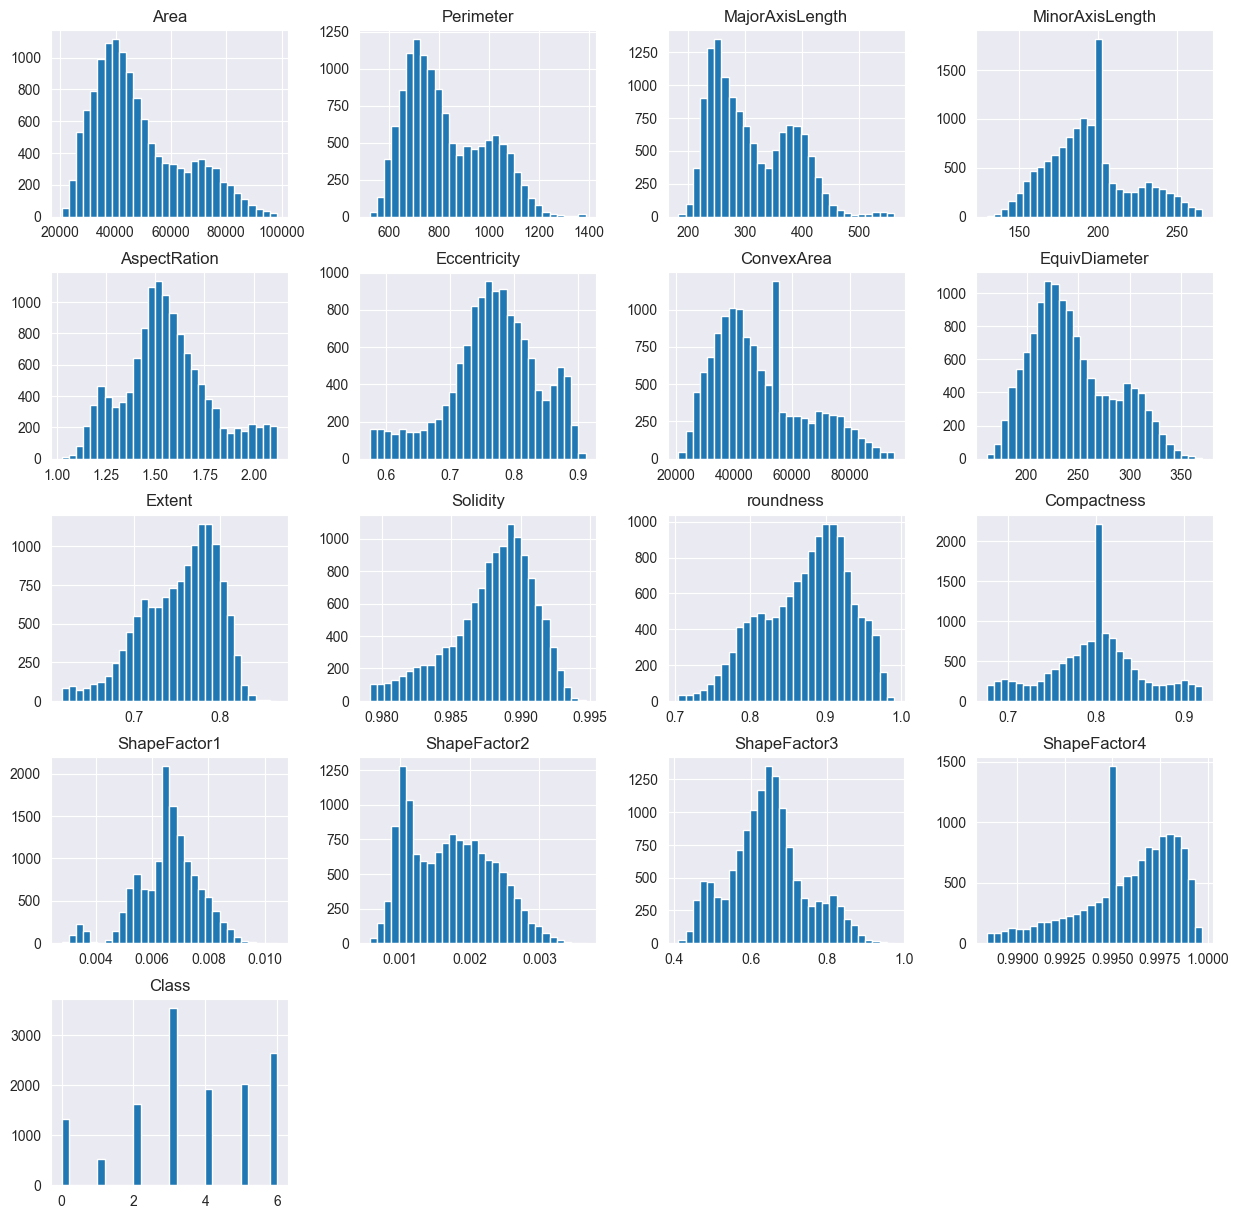

In [54]:
df.hist(bins=30, figsize=(15,15))
plt.show()

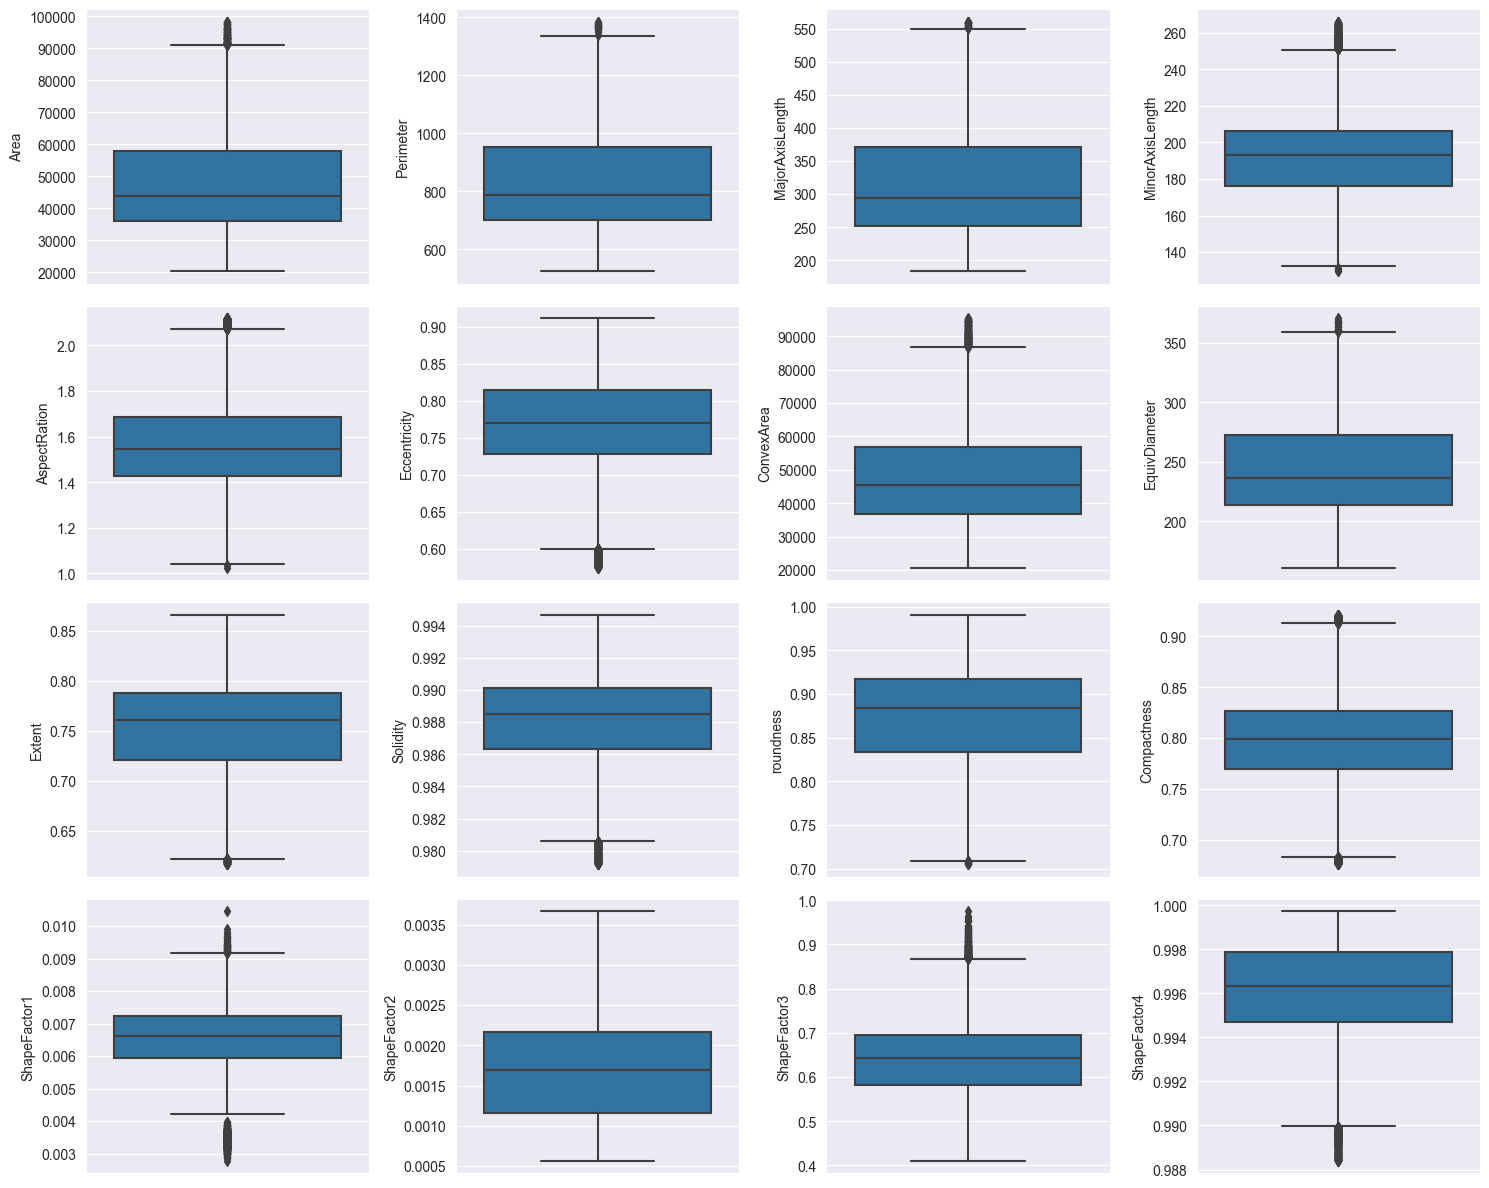

In [55]:
fig, ax = plt.subplots(4, 4, figsize=(15, 12))

for variable, subplot in zip(Numeric_cols, ax.flatten()):
    sns.boxplot(y= df[variable], ax=subplot)
plt.tight_layout()

In [56]:
df.isnull().sum()

Area               551
Perimeter          500
MajorAxisLength    379
MinorAxisLength    669
AspectRation       473
Eccentricity       843
ConvexArea         564
EquivDiameter      526
Extent             275
Solidity           778
roundness           91
Compactness        517
ShapeFactor1         0
ShapeFactor2         0
ShapeFactor3         0
ShapeFactor4       867
Class                0
dtype: int64

**DEALING WITH NULL VALUES**

In [57]:
missing_col = ['Area','Perimeter','MajorAxisLength','MinorAxisLength','AspectRation','Eccentricity','ConvexArea','EquivDiameter',
          'Extent','Solidity','roundness','Compactness','ShapeFactor4']
#Using mean to impute the missing values
for i in missing_col:
    df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].mean()


In [58]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395.0,610.291,208.178117,173.888747,1.197191,0.766148,28715.0,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734.0,638.018,200.524796,182.734419,1.097356,0.766148,29172.0,191.272750,0.783968,0.984986,0.887034,0.799551,0.006979,0.003564,0.909851,0.998430,5
2,29380.0,624.110,212.826130,175.931143,1.209713,0.766148,29690.0,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,30008.0,645.884,210.557999,182.516516,1.153638,0.766148,30724.0,195.467062,0.782681,0.987958,0.903936,0.798288,0.007017,0.003215,0.861794,0.994199,5
4,30140.0,620.134,201.847882,190.279279,1.060798,0.766148,30417.0,195.896503,0.773098,0.990893,0.984877,0.798288,0.006697,0.003665,0.941900,0.999166,5


In [59]:
df.shape

(13611, 17)

# Feature Engineering

**Label Encoding**  

"Class" column is str so we need to convert the labels into a numeric form.

In [60]:
labelencoder = LabelEncoder()
df["Class"] = labelencoder.fit_transform(df['Class'])

**Splitting Data Into Train and Test Subsets**

In [61]:
x = df.drop(columns='Class')
y = df['Class']

In [62]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.20, random_state=0) 

**feature scaling**

In [63]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

**Importing EvaluAtion Libraries**

In [64]:
from sklearn import metrics
from sklearn.metrics import precision_score,accuracy_score,recall_score,confusion_matrix
from sklearn.metrics import classification_report

# 1. LOGISTIC REGRESSION

In [65]:
from sklearn.linear_model import LogisticRegression
regressor=LogisticRegression(random_state=0)
regressor.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [66]:
y_pred=regressor.predict(x_test)

In [67]:
regressor.score(x_test,y_test)

0.9188395152405435

In [68]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.85      0.88       255
           1       1.00      1.00      1.00        92
           2       0.92      0.93      0.92       350
           3       0.92      0.93      0.93       735
           4       0.94      0.94      0.94       390
           5       0.94      0.96      0.95       376
           6       0.86      0.87      0.86       525

    accuracy                           0.92      2723
   macro avg       0.93      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



# 2. DECISION TREE

In [69]:
from sklearn.tree import DecisionTreeClassifier
dtc_model = DecisionTreeClassifier()
dtc_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [70]:
y_pred = dtc_model.predict(x_test)
print('Accuracy: %.5f' % accuracy_score(y_test, y_pred))

Accuracy: 0.88358


In [71]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       255
           1       1.00      1.00      1.00        92
           2       0.88      0.88      0.88       350
           3       0.90      0.89      0.89       735
           4       0.92      0.91      0.91       390
           5       0.93      0.93      0.93       376
           6       0.79      0.83      0.81       525

    accuracy                           0.88      2723
   macro avg       0.90      0.90      0.90      2723
weighted avg       0.88      0.88      0.88      2723



# 3. RANDOM FOREST CLASSIFIER

In [72]:
forest = RandomForestClassifier(n_estimators=10, 
                                random_state=42, 
                                max_depth=8, 
                                max_features=5, 
                                min_samples_leaf=5)

forest.fit(x_train, y_train)
y_pred = forest.predict(x_test)

**Classification Report and Accuracy Score**

In [109]:
from sklearn.metrics import accuracy_score, r2_score,confusion_matrix, plot_confusion_matrix, classification_report,f1_score

print('Accuracy: %.5f' % accuracy_score(y_test, y_pred))
report=classification_report(y_test,y_pred)
print(report)

Accuracy: 0.92655
              precision    recall  f1-score   support

           0       0.95      0.88      0.92       255
           1       1.00      1.00      1.00        92
           2       0.93      0.95      0.94       350
           3       0.93      0.93      0.93       735
           4       0.96      0.94      0.95       390
           5       0.95      0.97      0.96       376
           6       0.86      0.88      0.87       525

    accuracy                           0.93      2723
   macro avg       0.94      0.93      0.94      2723
weighted avg       0.93      0.93      0.93      2723



# Model Tuning
In order to improve the performance of the model searching for better parameters.
- **Parameters Grid and RandomizedSearchCV**

In [110]:
param_grid = {
    'n_estimators': [10, 100, 200],
    'max_features': [2, 4, 5, 6],
    'min_samples_leaf': [1, 2, 4, 5],
    'max_depth': [5, 8, 10]
}

In [112]:
from sklearn.model_selection import RandomizedSearchCV

In [115]:
clf = RandomizedSearchCV(forest, param_grid, scoring='accuracy', n_jobs=-1, random_state=42)
search = clf.fit(x_train, y_train)

**Best Score of Search and Best Hyperparameters**

In [118]:
print('Best Score: %s' % search.best_score_)
print('Best Hyperparameters: %s' % search.best_params_)

Best Score: 0.915687294290042
Best Hyperparameters: {'n_estimators': 10, 'min_samples_leaf': 1, 'max_features': 6, 'max_depth': 10}


**Using New Parameters in RFC**

In [121]:
forest_new_param = RandomForestClassifier(n_estimators=10,
                                          min_samples_leaf=1, 
                                          max_features=6, 
                                          max_depth=10, 
                                          random_state=42)
forest_new_param.fit(x_train, y_train)
y_pred_new_param = forest_new_param.predict(x_test)

New Classification Results



In [125]:
print('Accuracy: %.5f' % accuracy_score(y_test, y_pred_new_param))
print(classification_report(y_test, y_pred_new_param))

Accuracy: 0.92031
              precision    recall  f1-score   support

           0       0.94      0.85      0.90       255
           1       1.00      1.00      1.00        92
           2       0.91      0.94      0.93       350
           3       0.92      0.94      0.93       735
           4       0.96      0.93      0.95       390
           5       0.95      0.94      0.95       376
           6       0.86      0.87      0.86       525

    accuracy                           0.92      2723
   macro avg       0.93      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



**Conclusion of Model Tuning:**
- The Result Hasn't Been Improved as Much as Hoped

# 4. XGB CLASSIFIER

In [116]:
from sklearn.metrics import accuracy_score, r2_score,confusion_matrix, plot_confusion_matrix, classification_report,f1_score

In [75]:
import xgboost as xgb

Train F1_Score:  0.9606906686260103
Test F1_Score:  0.9294895336026442


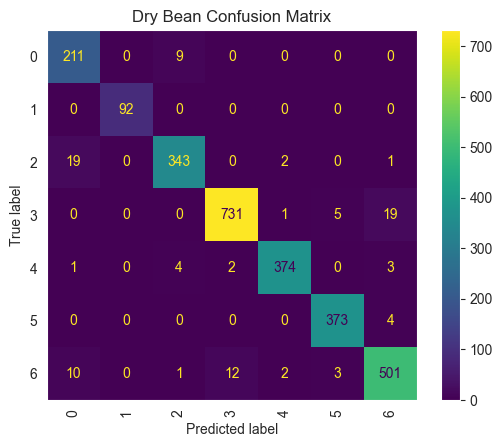

In [76]:
model_xgb= xgb.XGBClassifier(random_state=42,verbosity=0, min_child_weight=2,
                             max_depth=4, learning_rate=0.15, gamma=0.22, colsample_bytree=0.5)

model_xgb.fit(x_train, y_train)

print("Train F1_Score: ", metrics.f1_score(y_train, model_xgb.predict(x_train), average='micro'))
print("Test F1_Score: ", metrics.f1_score(y_test, model_xgb.predict(x_test), average='micro'))
# Displaying Results in Confusion Matrix
plot_confusion_matrix(model_xgb, x_test, y_pred)  
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean Confusion Matrix')
plt.show()  

# 5. SVC CLASSIFIER

In [77]:
from sklearn.svm import SVC

Train F1_Score:  0.9414033798677444
Test F1_Score:  0.9309585016525891


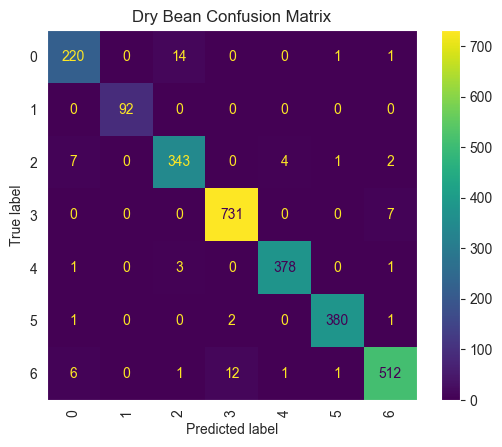

In [105]:
model_svc = SVC(probability=True, kernel='rbf', C=25)

model_svc.fit(x_train, y_train)

print("Train F1_Score: ", metrics.f1_score(y_train, model_svc.predict(x_train), average='micro'))
print("Test F1_Score: ", metrics.f1_score(y_test, model_svc.predict(x_test), average='micro'))

# Displaying Results in Confusion Matrix
plot_confusion_matrix(model_svc, x_test, y_pred)  
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean Confusion Matrix')
plt.show()  

# 6. ADA BOOST CLASSIFIER

In [79]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, make_scorer

In [80]:
f1 = make_scorer(f1_score , average = "weighted")

In [81]:
params_ada = {
    "n_estimators": [5, 10, 15, 20],
    "learning_rate": [0.4, 0.6, 0.8, 1.0]
}

In [82]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [83]:
gs_ada = GridSearchCV(AdaBoostClassifier(base_estimator = RandomForestClassifier(max_depth = 10, n_estimators = 20, random_state = 42)), param_grid = params_ada, scoring = f1, cv = 4, n_jobs = -1)

In [84]:
gs_ada.fit(x_train, y_train)

GridSearchCV(cv=4,
             estimator=AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=10,
                                                                                n_estimators=20,
                                                                                random_state=42)),
             n_jobs=-1,
             param_grid={'learning_rate': [0.4, 0.6, 0.8, 1.0],
                         'n_estimators': [5, 10, 15, 20]},
             scoring=make_scorer(f1_score, average=weighted))

## Hyper Parameter Tuning

In [85]:
gs_ada.cv_results_

{'mean_fit_time': array([ 4.87785131, 10.35834247, 16.53836489, 22.42002928,  5.479985  ,
        10.95319235, 15.86080438, 21.6320262 ,  5.492818  , 10.76013643,
        16.01835638, 22.02414787,  5.45075428, 11.39785415, 16.84100831,
        18.2159825 ]),
 'std_fit_time': array([0.06577241, 0.28534702, 0.16587856, 0.16090457, 0.08897392,
        0.09973816, 0.18520815, 0.36602455, 0.090765  , 0.06965243,
        0.11327035, 0.27104221, 0.06680637, 0.18851212, 0.13362801,
        0.2098498 ]),
 'mean_score_time': array([0.09607863, 0.21366239, 0.29246914, 0.43946701, 0.10929698,
        0.20329505, 0.32578152, 0.41509134, 0.10630858, 0.20614421,
        0.30832273, 0.45193428, 0.10896283, 0.23175013, 0.28534657,
        0.24381679]),
 'std_score_time': array([0.01253087, 0.01737664, 0.01698432, 0.01767717, 0.01613127,
        0.01307981, 0.0209447 , 0.02516577, 0.00415026, 0.0051406 ,
        0.01497647, 0.02559751, 0.00372367, 0.00413171, 0.03695345,
        0.0479733 ]),
 'param_le

In [86]:
gs_ada.best_params_

{'learning_rate': 0.4, 'n_estimators': 5}

In [87]:
ada = AdaBoostClassifier(base_estimator = RandomForestClassifier(max_depth = 10, n_estimators = 20, random_state = 42), n_estimators = 20, learning_rate = 0.6, random_state = 42)

#### Evaluating AdaBoost Classifier

Model's performance is evaluated on all three sets. To avoid repeating one and the same computations, the relevant code is organised into function.

In [88]:
def classification_task(estimator, attributes, labels):
    """
    Function: "fit", "predict" and "score" values of an estimator.
    
    Parameters: estimator, attributes (X) and labels (y).
    
    Returns: model's performance measured as accuracy and f1_score.
    """
    estimator.fit(attributes, labels)
    predictions = estimator.predict(attributes)
    
    print(f"Accuracy: {accuracy_score(labels, predictions)}")
    print(f"F1 score: {f1_score(labels, predictions, average = 'weighted')}")

In [89]:
classification_task(ada, x_train, y_train)

Accuracy: 0.9627112417340191
F1 score: 0.9627226027395447


In [90]:
classification_task(ada, x_test, y_test)

Accuracy: 0.9886154976129269
F1 score: 0.9886092377816345


In [91]:
predicted = ada.predict(x_test)

In [92]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       255
           1       1.00      1.00      1.00        92
           2       0.97      0.99      0.98       350
           3       0.99      1.00      0.99       735
           4       1.00      0.98      0.99       390
           5       0.99      1.00      1.00       376
           6       0.99      0.98      0.99       525

    accuracy                           0.99      2723
   macro avg       0.99      0.99      0.99      2723
weighted avg       0.99      0.99      0.99      2723



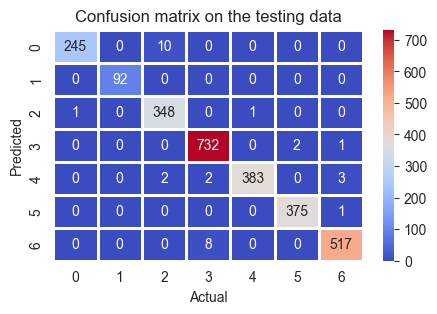

In [96]:
# Plot confusion matrix
plt.figure(figsize = (5, 3))
sns.heatmap(confusion_matrix(y_test, predicted),
            annot = True,
            fmt = ".0f",
            cmap = "coolwarm",
            linewidths = 2, 
            linecolor = "white",
            xticklabels = ada.classes_,
            yticklabels = ada.classes_)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Confusion matrix on the testing data")
plt.show()

# 7. VOTING CLASSIFIER

In [98]:
from sklearn.ensemble import VotingClassifier

F1_Score:  0.927653323540213


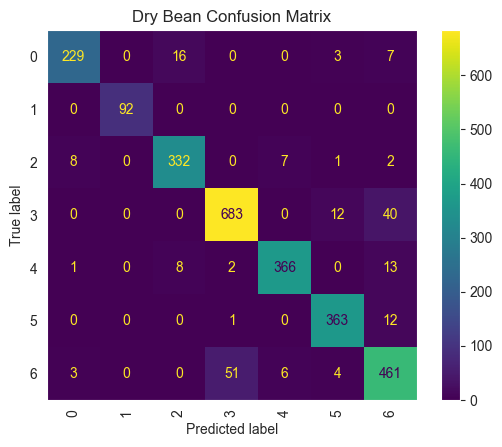

In [127]:
voting_model = VotingClassifier(estimators=[('xgb', model_xgb), ('svc', model_svc),('Randomforest', forest),
                                            ('DT', dtc_model),('ADA', ada)], voting='soft')
voting_model.fit(x_train, y_train)

print("F1_Score: ", metrics.f1_score(y_test, voting_model.predict(x_test), average='micro'))

# Displaying Results in Confusion Matrix
plot_confusion_matrix(voting_model, x_test, y_test)  
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean Confusion Matrix')
plt.show()

**Comparing All Seven Algorithms**

In [128]:
for clf in (model_svc, model_xgb, forest, regressor,  dtc_model, ada, voting_model):
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, metrics.f1_score(y_test, y_pred, average='micro'))

SVC 0.9309585016525891
XGBClassifier 0.9294895336026442
RandomForestClassifier 0.9144326110907087
LogisticRegression 0.9188395152405436
DecisionTreeClassifier 0.8835842820418656
AdaBoostClassifier 0.9886154976129269
VotingClassifier 0.927653323540213


# Conclusion

I successfully investigated the imported data(Dealing with missing values and outliers )and performed **Exploratory Data Analysis**. Key information was obtained which was useful for the rest of the task. Data visualization was performed and correlations were examined. In addition, Feature Engineering was performed. **Hyper-Parameter Tuning** of model along with the ensemble modeling technique of **VOTING classifier** was also performed. **AdaBoostClassifier** obtained the best result at the level of **98%**. 
